In [1]:
import numpy as np
import matplotlib.pyplot as plt
from my_dnn import model, optimizers, loss, metrics
import pandas as pd

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train.shape[1]

12

In [7]:
my_model = model.SimpleDnn(layer_dims = [X_train.shape[1], 64, 32, 16, 8, 4, 1], output_activation = 'sigmoid')

In [8]:
my_model.compile(optimizer = optimizers.GD(), loss = loss.BinaryCrossEntropy(), metrics = metrics.Accuracy())

In [9]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.reshape(1, -1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12, 8000)
(12, 2000)
(1, 8000)
(2000,)


In [10]:
my_model.train(X_train, y_train, epochs = 50, batch_size = 64, verbose = 1)

0.828125
0.8125
0.890625
0.828125
0.796875
0.84375
0.703125
0.828125
0.75
0.734375
0.828125
0.875
0.8125
0.78125
0.75
0.75
0.796875
0.84375
0.859375
0.75
0.765625
0.75
0.8125
0.765625
0.75
0.765625
0.859375
0.875
0.796875
0.828125
0.84375
0.84375
0.6875
0.734375
0.890625
0.828125
0.84375
0.8125
0.78125
0.78125
0.796875
0.71875
0.828125
0.78125
0.8125
0.765625
0.84375
0.8125
0.8125
0.796875
0.8125
0.828125
0.796875
0.875
0.828125
0.75
0.75
0.78125
0.71875
0.796875
0.796875
0.765625
0.78125
0.765625
0.734375
0.75
0.796875
0.71875
0.71875
0.734375
0.703125
0.84375
0.8125
0.828125
0.796875
0.875
0.734375
0.765625
0.828125
0.75
0.8125
0.78125
0.703125
0.75
0.78125
0.796875
0.796875
0.8125
0.859375
0.78125
0.796875
0.875
0.796875
0.8125
0.8125
0.78125
0.796875
0.84375
0.75
0.828125
0.8125
0.765625
0.796875
0.765625
0.84375
0.796875
0.734375
0.734375
0.796875
0.703125
0.8125
0.734375
0.78125
0.84375
0.859375
0.765625
0.875
0.78125
0.734375
0.84375
0.84375
0.78125
0.78125
0.859375
0.8125
Epoch

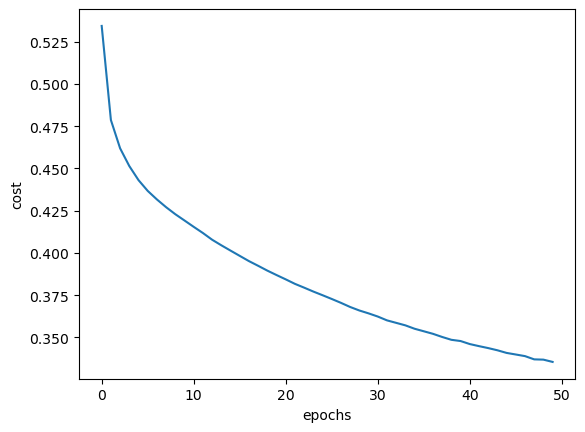

In [11]:
plt.plot(np.squeeze(my_model.get_costs()))
plt.ylabel('cost')
plt.xlabel('epochs')
# plt.title("Learning rate =" + str(learning_rate))
plt.show()

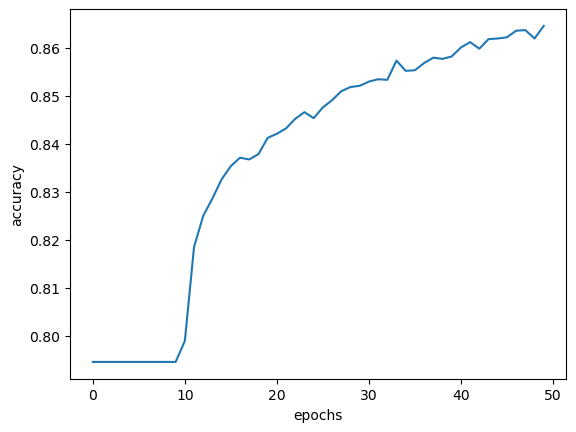

In [12]:
plt.plot(np.squeeze(my_model.get_evals()))
plt.ylabel('accuracy')
plt.xlabel('epochs')
# plt.title("Learning rate =" + str(learning_rate))
plt.show()

In [13]:
y_pred = my_model.predict(X_test)
y_pred

array([[False, False, False, ...,  True, False, False]])

In [14]:
y_pred = y_pred.reshape(y_test.shape)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1509   98]
 [ 202  191]]


0.85